# NLP Project

*Team members*:
- Asja Attanasio
- Daniele Laganà
- Marcello Martini
- Gianluigi Palmisano

# Import Dataset

Each record has three features:
- context
- question
- answer

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
from datasets import load_dataset

tqdm.pandas()

/opt/homebrew/Caskroom/miniforge/base/envs/NLP/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Import dataset using the Hugging Face datasets library
dataset = load_dataset("neural-bridge/rag-dataset-12000")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['context', 'question', 'answer'],
        num_rows: 9600
    })
    test: Dataset({
        features: ['context', 'question', 'answer'],
        num_rows: 2400
    })
})

In [5]:
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()

In [6]:
train_df.head()

,context,question,answer
0,Caption: Tasmanian berry grower Nic Hansen sho...,What is the Berry Export Summary 2028 and what...,The Berry Export Summary 2028 is a dedicated e...
1,RWSN Collaborations\nSouthern Africa Self-supp...,What are some of the benefits reported from ha...,Benefits reported from having access to Self-s...
2,All Android applications categories\nDescripti...,What are the unique features of the Coolands f...,The unique features of the Coolands for Twitte...
3,"How unequal is India? The question is simple, ...",What is the main difference between the Nation...,The main difference between the NSS and the IH...
4,Gunnar Nelson took his time on the feet agains...,How did Gunnar Nelson win the fight against Za...,Gunnar Nelson won the fight against Zak Cummin...


In [7]:
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))
print("Columns:", train_df.columns)

Train set size: 9600
Test set size: 2400
Columns: Index(['context', 'question', 'answer'], dtype='object')


# Data exploration

In [8]:
# Count rows with at least one missing value in 'context', 'question', or 'answer'
missing_rows_train = train_df[['context', 'question', 'answer']].isnull().any(axis=1).sum()
missing_rows_test = test_df[['context', 'question', 'answer']].isnull().any(axis=1).sum()

print("Rows with at least one missing value in train set:", missing_rows_train)
print("Rows with at least one missing value in test set:", missing_rows_test)

# Remove null values
train_df = train_df.dropna()
test_df = test_df.dropna()

Rows with at least one missing value in train set: 2
Rows with at least one missing value in test set: 1


In [10]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Initialize lists and variables for analysis
context_lengths = []
question_lengths = []
vocab = set()
all_tokens = []

# Function to preprocess text
def preprocess(text):
    """Tokenize, lowercase, remove punctuation and stopwords from text."""
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]  # Keep only alphanumeric tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Function to process a single entry
def process_entry(entry):
    """Process a single dataset entry to extract tokens and update statistics."""
    context_tokens = preprocess(entry['context'])
    question_tokens = preprocess(entry['question'])
    
    # Update lengths
    context_lengths.append(len(context_tokens))
    question_lengths.append(len(question_tokens))
    
    # Update vocabulary and token list
    vocab.update(context_tokens)
    vocab.update(question_tokens)
    all_tokens.extend(context_tokens)
    all_tokens.extend(question_tokens)

train_df.apply(process_entry, axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinimarcello00/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinimarcello00/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/martinimarcello00/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0       None
1       None
2       None
3       None
4       None
        ... 
9595    None
9596    None
9597    None
9598    None
9599    None
Length: 9598, dtype: object

In [11]:
fdist = FreqDist(all_tokens)
fdist

FreqDist({'one': 14432, 'also': 10326, 'new': 10136, 'time': 10131, 'like': 9989, 'would': 8828, 'get': 8782, 'said': 7855, 'people': 7767, 'first': 6947, ...})

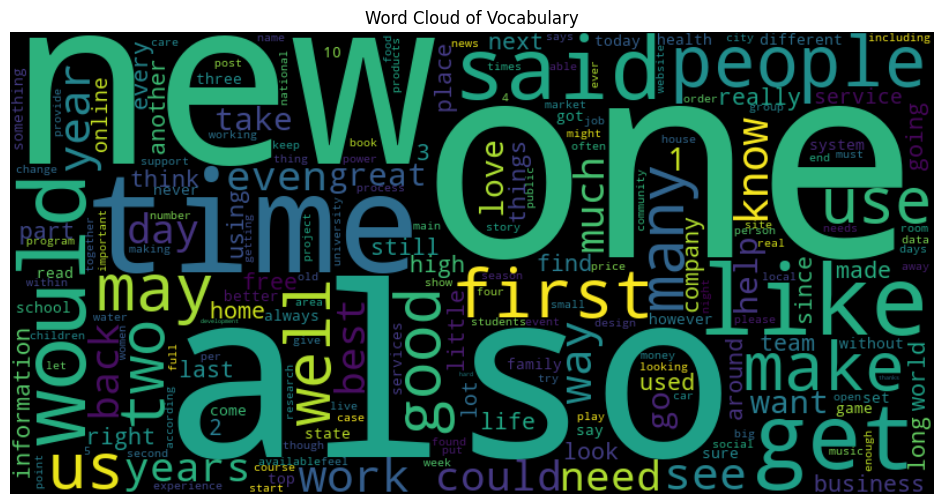

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(fdist)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Vocabulary")
plt.show()